In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(3,), name="my_input")
feature = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(feature)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [3]:
feature.shape

TensorShape([None, 64])

In [4]:
vocabulary_size = 10000
num_tag = 100
num_departments = 4

# 모델의 입력을 정의
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size), name="text_body")
tags = keras.Input(shape=(num_tag,), name="tags")

# 입력 특성을 하나의 텐서 feature로 연결
feature = layers.Concatenate()([title, text_body, tags])
# 중간층을 적용하여 입력 특성을 더 풍부한 표현으로 재결합
feature = layers.Dense(64, activation="relu")(feature)

# 모델의 출력을 정의
priority = layers.Dense(1, activation="sigmoid", name="priority")(feature)
department = layers.Dense(num_departments, activation="softmax", name="department")(feature)

# 모델의 입력과 출력의 지정하여 생성
model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, department])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

In [5]:
import numpy as np

num_samples = 1280

# 더미 입력 데이터
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tag))

In [6]:
# 더미 타겟 데이터
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.random(size=(num_samples, num_departments))

In [7]:
# 모델 설정
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=["mean_absolute_error", "accuracy"])
# 모델 훈련
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
# 모델 평가
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
# 예측
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 2ms/step


In [8]:
# 입력과 출력이 많아 순서에 신경을 쓰고 싶지 않은 경우 딕셔너리로 전달할 수 있다.
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error",
                    "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_squared_error"],
                       "department":["categorical_crossentropy"]})

model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          {"priority": priority_data,
           "department": department_data},
           epochs=1)

model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               {"priority": priority_data,
                "department": department_data})

priority_preds, department_preds =\
      model.predict({"title": title_data,
                     "text_body": text_body_data,
                     "tags": tags_data})

40/40 [==============================] - 0s 1ms/step


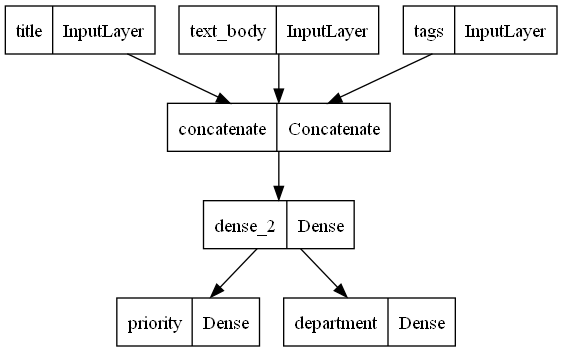

In [9]:
keras.utils.plot_model(model, "ticket_classifier.png")

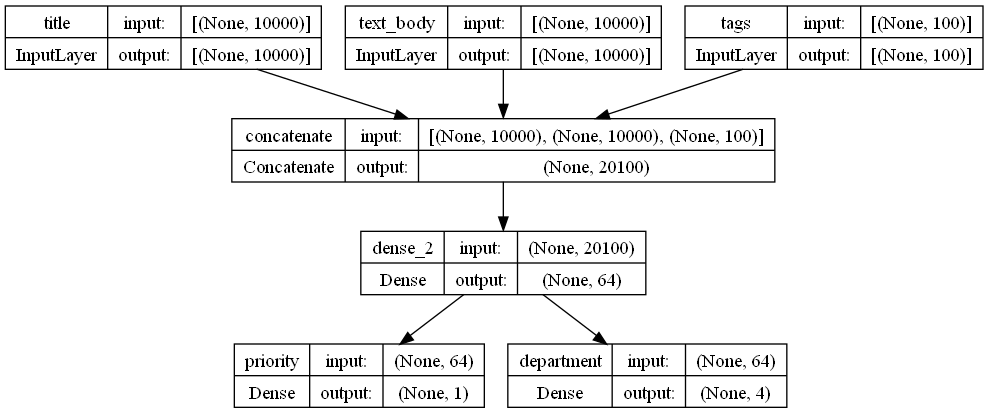

In [10]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True)

In [11]:
model.layers

In [24]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [25]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [27]:
# Layer[4]의 출력을 features에 저장, 중간 Dense층
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty]
)

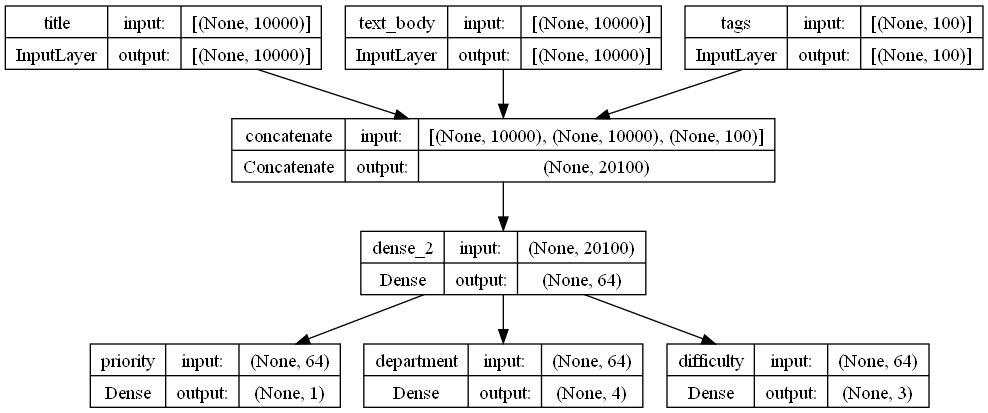

In [29]:
keras.utils.plot_model(new_model, "ticket_classifier.png", show_shapes=True)